# PCA (Principal Component Analysis)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
churn_df = pd.read_csv("datasets/ChurnData.csv")

In [3]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
columns = churn_df.columns[:-1]
columns.size

27

In [11]:
X = np.asarray(churn_df.loc[:, columns], dtype=np.float32)
y = np.asarray(churn_df['churn'])

In [12]:
# train / test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
print(X_train.shape)
print(X_test.shape)

(160, 27)
(40, 27)


### PCA 적용 전 Logistic Regression

In [15]:
# Fitting Logistic Regression
clf = LogisticRegression(solver='lbfgs', random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
# predict test set
y_pred = clf.predict(X_test)
# Confusion matrix
accuracy_score(y_test, y_pred)

0.775

### PCA 적용

In [43]:
# Apply kernel PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [44]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(160, 2)
(40, 2)


In [45]:
print("첫번째 주성분")
print(pca.components_.T[:, 0])
print('설명된 분산의 비율', pca.explained_variance_ratio_)

첫번째 주성분
[0.18870354 0.09407614 0.06999405 0.02405312 0.08039898 0.10532435
 0.09130085 0.22012742 0.24022958 0.17035776 0.26783183 0.16389705
 0.2501761  0.28326213 0.17638114 0.27435675 0.22993094 0.24062704
 0.26112434 0.07476059 0.2272928  0.21587765 0.06959382 0.1745782
 0.17900106 0.07082582 0.29324025]
설명된 분산의 비율 [0.25193474 0.21764484]


In [46]:
# Fitting Logistic Regression
clf = LogisticRegression(solver='lbfgs', random_state=0)
clf.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
# predict test set
y_pred = clf.predict(X_test_pca)

In [48]:
# Confusion matrix
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.725

In [49]:
sum(pca.explained_variance_ratio_)

0.4695795774459839

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


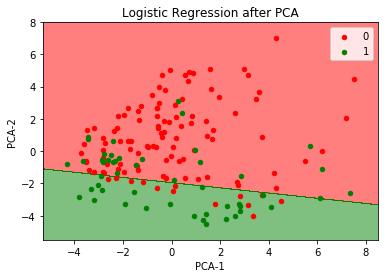

In [52]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train_pca, y_train
#X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01),
                                 np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01))

XX = np.c_[X1.ravel(), X2.ravel()]
Y = clf.predict(XX)

plt.contourf(X1, X2, Y.reshape(X1.shape), cmap=ListedColormap(('red', 'green')), alpha=0.5)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], s=20, c=ListedColormap(('red', 'green'))(i), label=i)
    
plt.title('Logistic Regression after PCA')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.legend()

# 실습 - Cell sample data 를 이용한 PCA + SVC 

In [53]:
cell_df = pd.read_csv("datasets/cell_samples.csv")

In [54]:
feature_df = cell_df.drop(['ID', 'BareNuc'], axis=1)
feature_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2


In [ ]:
# Scaling, Train / Test split

### PCA 적용전 SVC 로 accuracy test

In [ ]:
# Your code here

### PCA 적용후 SVC 로 accuracy test 하여 전과 비교

In [ ]:
# Your code here